**Kidney Disease Prediction**

**Objective**

-> As we know that,Chronic Kidney Disease (CKD) is become major health problem around the world, which results in renal failure, cardiovascular disease, and early death.

-> From research papers, it is found that rate of ckd had been increased up to the 17 % from all over the world.

-> From Reports ,it is found that out of every 10 people 1 people suffering the Chronic Kidney Disease.

-> If Chronic Kidney Disease detected earlier then it can be diagnosed and also controlled with the help of the medicines.

-> The objective of the project is create model which can determine chances of the chronic kidney disease with the help of the suitable parameters.

-> Also,to find which are the parameters are important to check the chances of the chronic kidney disease.

-> This project will help for early detection of the chronic kidney disease.

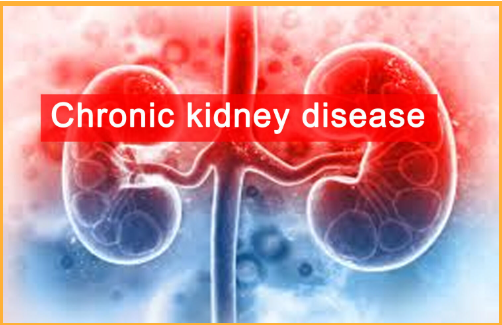

In [4]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Loading the dataset
# Load file
df = pd.read_csv('Downloads/kidney_disease.csv')
df.head()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

**Understanding Column Names**

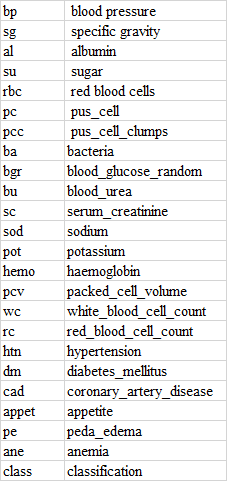

In [8]:
df.shape #Shows No of Rows and columns

(400, 26)

In [9]:
df.describe() #Shows Descriptive statistics[mean/median/max/min/std/counts] of the Dataset

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


**Data Preprocessing**

In [11]:
#Checking duplicates
df.duplicated().sum()

0

In [12]:
#Checking null values
df.isnull().sum().sum() #Total null values

1009

In [13]:
#Handling null values using SimpleImputer method
from sklearn.impute import SimpleImputer
imputed= SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df_imputed=pd.DataFrame(imputed.fit_transform(df))
df_imputed.columns = df.columns
df_imputed

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [14]:
df_imputed.isnull().sum().sum()

0

In [15]:
#Handling Unique Values
#Changing the unique values
# Numerical Column [pcv,wc,rc]
print(set(df_imputed['pcv'].tolist()))

{'20', '17', '34', '53', '28', '41', '16', '40', '9', '39', '31', '19', '48', '25', '51', '36', '44', '52', '43', '50', '42', '15', '\t43', '30', '38', '29', '45', '\t?', '47', '33', '21', '24', '22', '54', '23', '32', '26', '37', '35', '49', '27', '46', '14', '18'}


In [16]:
df_imputed['pcv']=df_imputed['pcv'].apply(lambda x:'43' if x=='\t43?' else x  )
df_imputed['pcv'].mode() #choose mode value for odd value | mode=41
df_imputed['pcv']=df_imputed['pcv'].apply(lambda x: '41' if x=='\t?' else x)

In [17]:
print(set(df_imputed['wc'].tolist()))

{'11000', '4900', '5000', '14900', '7400', '8300', '15200', '9200', '7300', '8800', '11300', '\t8400', '2200', '6000', '6400', '7200', '6300', '6900', '9800', '10200', '8500', '12400', '9000', '9900', '3800', '12700', '5200', '7700', '11900', '12800', '8400', '5800', '9700', '14600', '9100', '11800', '4200', '12300', '5600', '5400', '6200', '7100', '16700', '10800', '26400', '\t6200', '12500', '7500', '16300', '4300', '9500', '18900', '12000', '10700', '4500', '7000', '21600', '11400', '9600', '7900', '8600', '6500', '8100', '5500', '12200', '9300', '4700', '12100', '6700', '19100', '4100', '8200', '7800', '5900', '5100', '5300', '8000', '15700', '9400', '13600', '10900', '13200', '11200', '5700', '10500', '\t?', '2600', '6800', '11500', '10400', '6600', '10300'}


In [18]:
df_imputed['wc']=df_imputed['wc'].apply(lambda x:'6200' if x=='\t6200' else x)
df_imputed['wc']=df_imputed['wc'].apply(lambda x:'8400' if x=='\t8400' else x)
df_imputed['wc'].mode() #modevalue=9800
df_imputed['wc']=df_imputed['wc'].apply(lambda x:'9800' if x=='\t?' else x)

In [19]:
print(set(df_imputed['rc'].tolist()))

{'5.6', '4.6', '5.3', '3', '2.4', '4.3', '5.1', '6.5', '3.6', '4.5', '3.8', '4.2', '6.4', '5.7', '5.4', '4.4', '4.9', '2.8', '6.2', '3.9', '3.2', '3.0', '5.0', '5.2', '2.7', '3.4', '2.1', '\t?', '2.6', '3.5', '3.1', '5.5', '3.7', '2.9', '6.3', '4.0', '2.3', '6.0', '5.8', '5', '5.9', '8.0', '4.7', '4.1', '4.8', '2.5', '4', '3.3', '6.1'}


In [20]:
df_imputed['rc'].mode() #mode = 5.2
df_imputed['rc']=df_imputed['rc'].apply(lambda x:'5.2' if x=='\t?' else x)

In [21]:
#changing Dtype of the numerical column [pcv,wc,rc]
df_imputed['pcv']=df_imputed['pcv'].astype('float64')
df_imputed['wc']=df_imputed['wc'].astype('float64')
df_imputed['rc']=df_imputed['rc'].astype('float64')

In [22]:
# Categorical Column [rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane]
print(set(df_imputed['dm'].tolist()))

{'no', '\tno', 'yes', ' yes', '\tyes'}


In [23]:
df_imputed['dm']=df_imputed['dm'].apply(lambda x:'yes' if x=='\tyes' else x)
df_imputed['dm']=df_imputed['dm'].apply(lambda x:'no' if x=='\tno' else x)
df_imputed['dm']=df_imputed['dm'].apply(lambda x:'yes' if x==' yes' else x)

In [24]:
print(set(df_imputed['cad'].tolist()))

{'no', 'yes', '\tno'}


In [25]:
df_imputed['cad']=df_imputed['cad'].apply(lambda x:'no' if x=='\tno' else x)

In [26]:
#Dependent variable[classification]
print(set(df_imputed['classification'].tolist()))

{'ckd\t', 'notckd', 'ckd'}


In [27]:
df_imputed['classification']=df_imputed['classification'].apply(lambda x:'ckd' if x=='ckd\t' else x  )

In [28]:
#Handling Encoding Values
#columns : rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
df_imputed=pd.get_dummies(df_imputed,columns=['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane','classification'],drop_first=True)


In [29]:
df_imputed.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo', 'pcv', 'wc', 'rc', 'rbc_normal', 'pc_normal', 'pcc_present',
       'ba_present', 'htn_yes', 'dm_yes', 'cad_yes', 'appet_poor', 'pe_yes',
       'ane_yes', 'classification_notckd'],
      dtype='object')

In [30]:
#Changing Boolean to numeric
df_imputed['rbc_normal']=np.where(df_imputed['rbc_normal']==True,1,0)
df_imputed['pc_normal'] = np.where(df_imputed['pc_normal']==True, 1, 0)
df_imputed['pcc_present'] = np.where(df_imputed['pcc_present']==True, 1, 0)
df_imputed['ba_present'] = np.where(df_imputed['ba_present']==True, 1, 0)
df_imputed['htn_yes'] = np.where(df_imputed['htn_yes']==True, 1, 0)
df_imputed['dm_yes'] = np.where(df_imputed['dm_yes']==True, 1, 0)
df_imputed['cad_yes'] = np.where(df_imputed['cad_yes']==True, 1, 0)
df_imputed['appet_poor'] = np.where(df_imputed['appet_poor']==True, 1, 0)
df_imputed['cad_yes'] = np.where(df_imputed['cad_yes']==True, 1, 0)
df_imputed['pe_yes'] = np.where(df_imputed['pe_yes']==True, 1, 0)
df_imputed['ane_yes'] = np.where(df_imputed['ane_yes']==True, 1, 0)
df_imputed['classification_notckd'] = np.where(df_imputed['classification_notckd']==True, 1, 0)

In [31]:
df_imputed.head()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes,classification_notckd
0,0,48.0,80.0,1.02,1.0,0.0,121.0,36.0,1.2,135.0,...,1,0,0,1,1,0,0,0,0,0
1,1,7.0,50.0,1.02,4.0,0.0,99.0,18.0,0.8,135.0,...,1,0,0,0,0,0,0,0,0,0
2,2,62.0,80.0,1.01,2.0,3.0,423.0,53.0,1.8,135.0,...,1,0,0,0,1,0,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,...,0,1,0,1,0,0,1,1,1,0
4,4,51.0,80.0,1.01,2.0,0.0,106.0,26.0,1.4,135.0,...,1,0,0,0,0,0,0,0,0,0


In [32]:
#Changing the datatype
for i in df.select_dtypes(exclude=['object']).columns:
    df_imputed[i] = df_imputed[i].apply(lambda x: float(x))

In [33]:
df_imputed['id'] = df_imputed['id'].astype('int64')

In [34]:
df_imputed.dtypes

id                         int64
age                      float64
bp                       float64
sg                       float64
al                       float64
su                       float64
bgr                      float64
bu                       float64
sc                       float64
sod                      float64
pot                      float64
hemo                     float64
pcv                      float64
wc                       float64
rc                       float64
rbc_normal                 int32
pc_normal                  int32
pcc_present                int32
ba_present                 int32
htn_yes                    int32
dm_yes                     int32
cad_yes                    int32
appet_poor                 int32
pe_yes                     int32
ane_yes                    int32
classification_notckd      int32
dtype: object

**EDA - Exploratory Data Analysis**

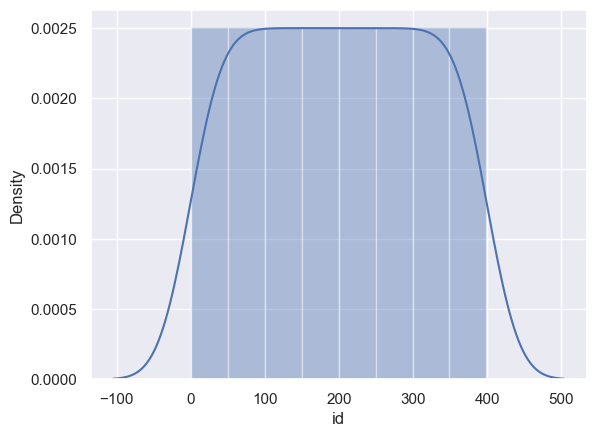

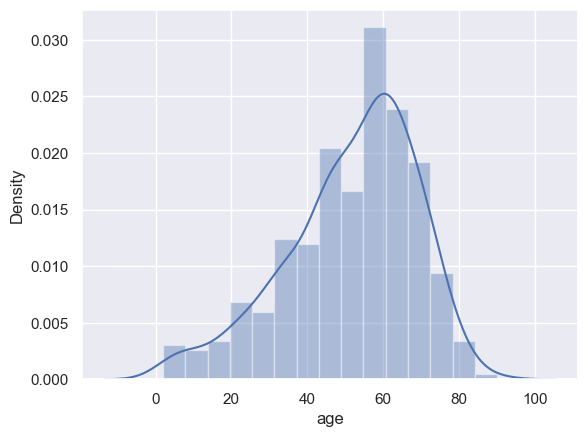

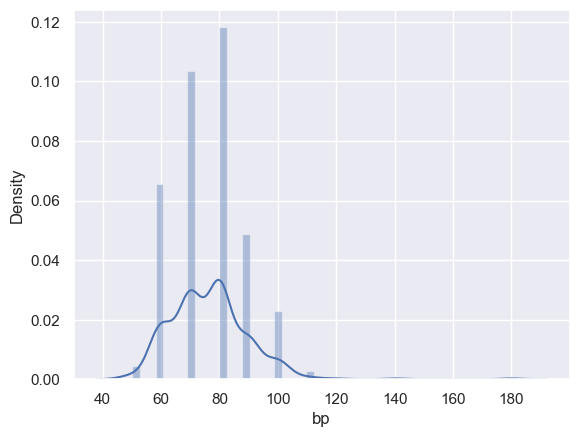

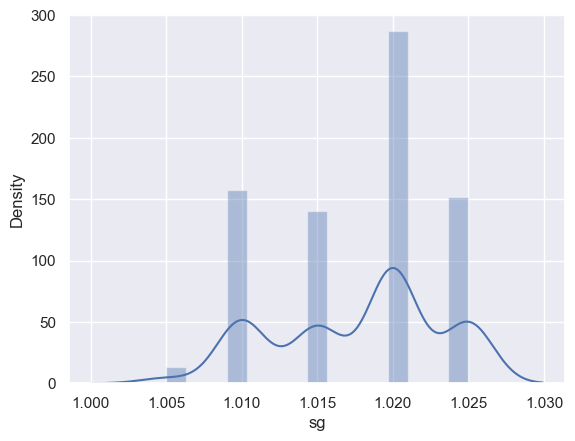

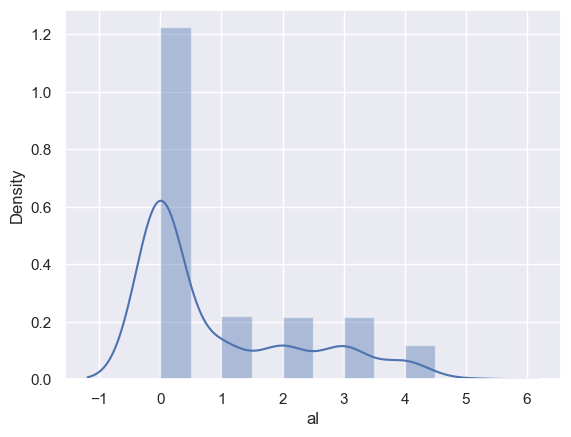

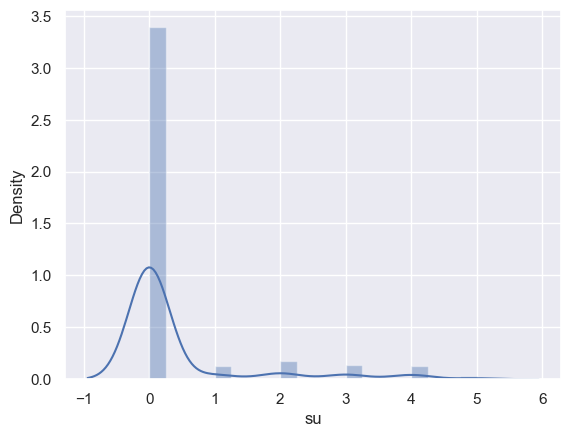

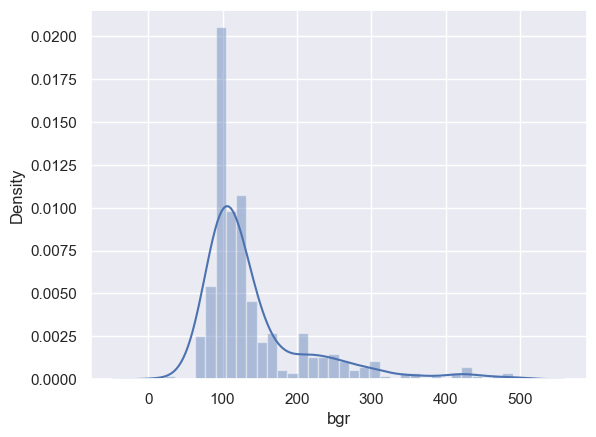

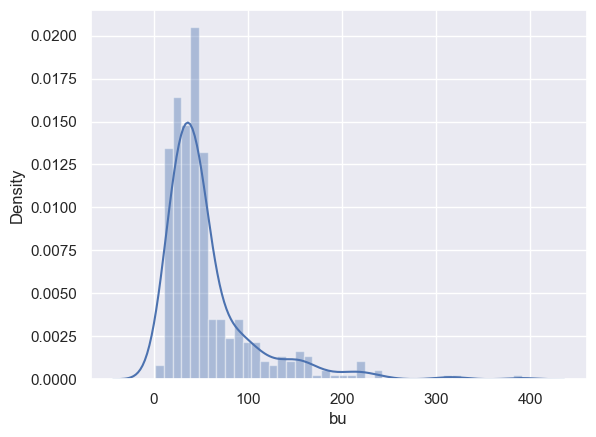

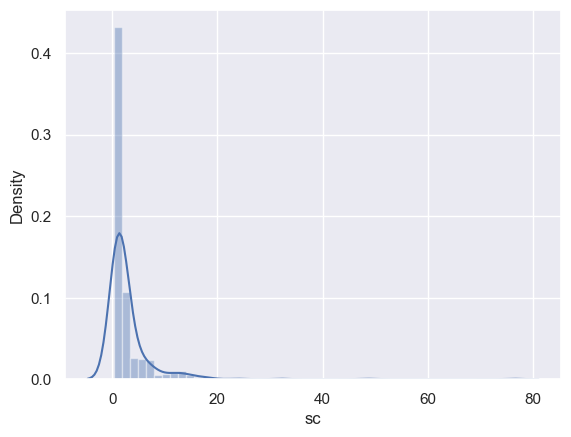

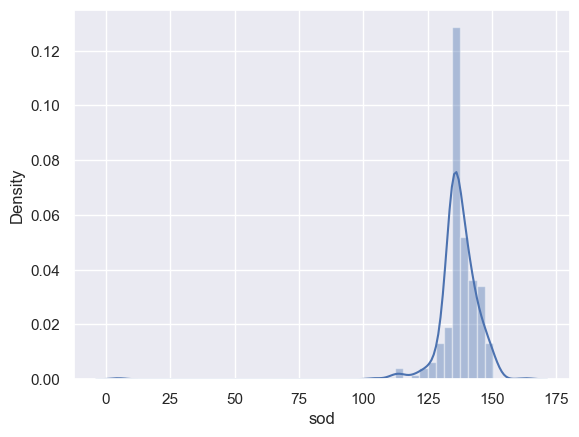

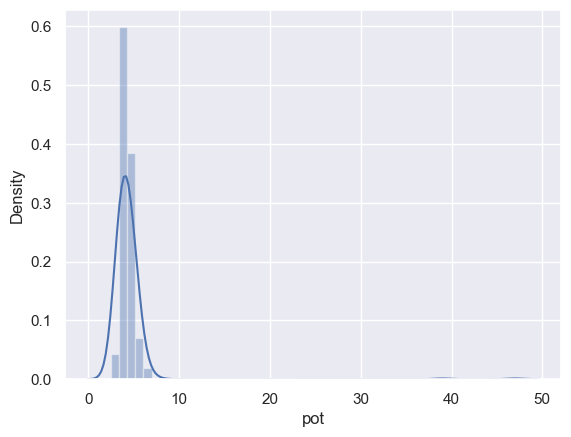

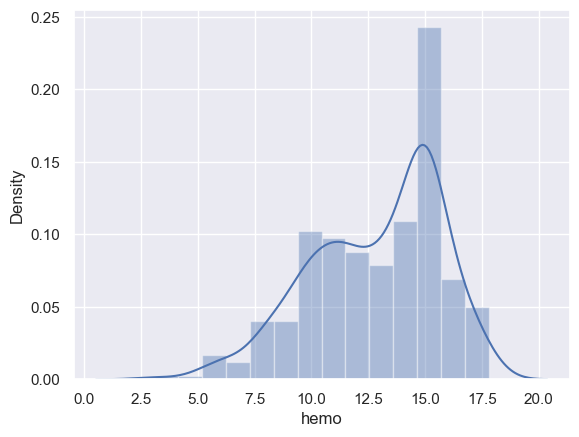

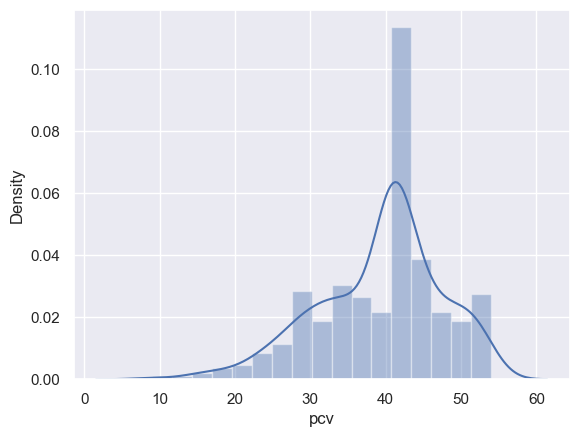

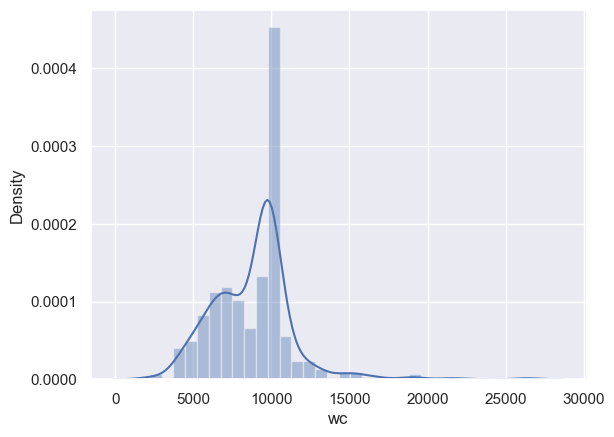

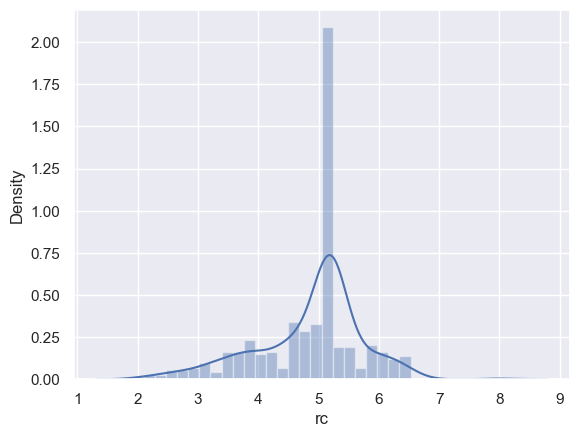

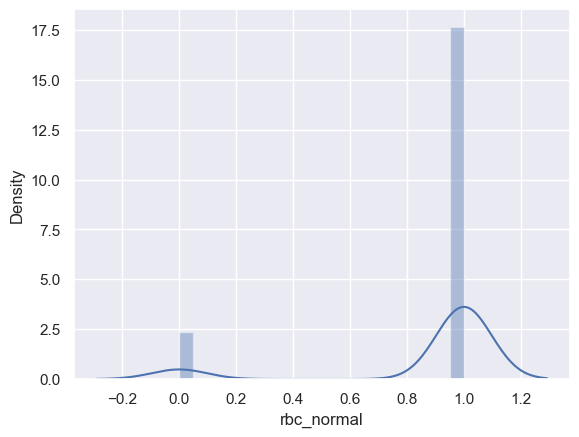

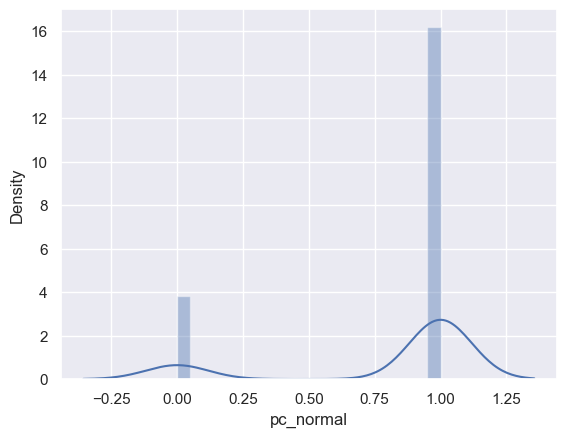

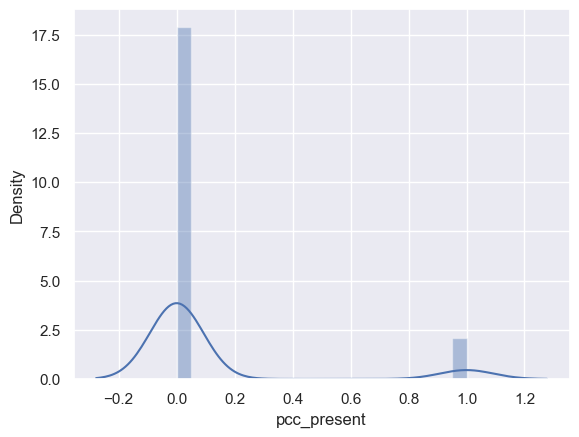

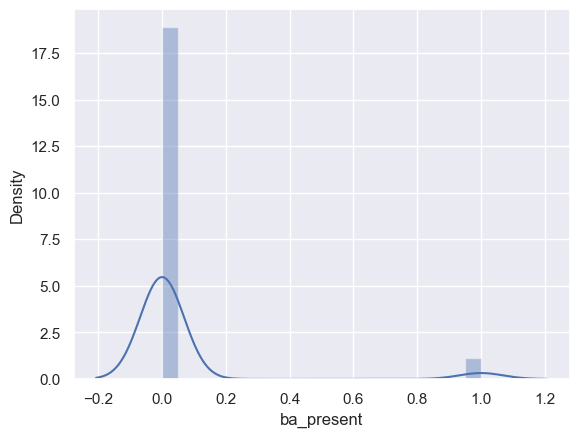

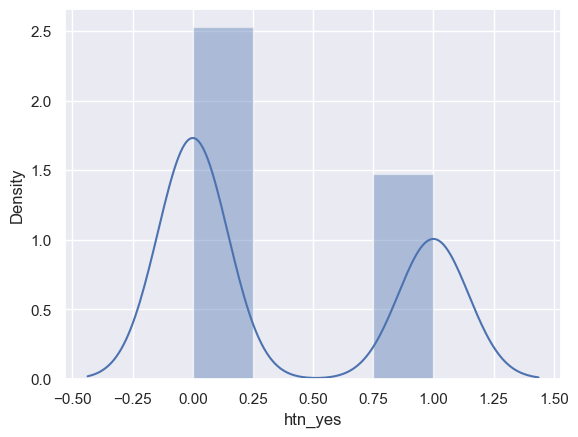

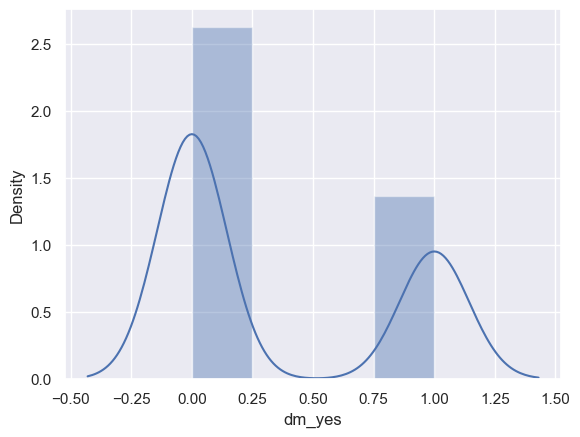

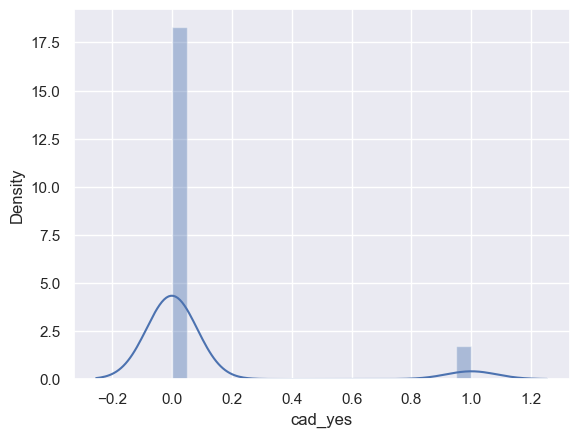

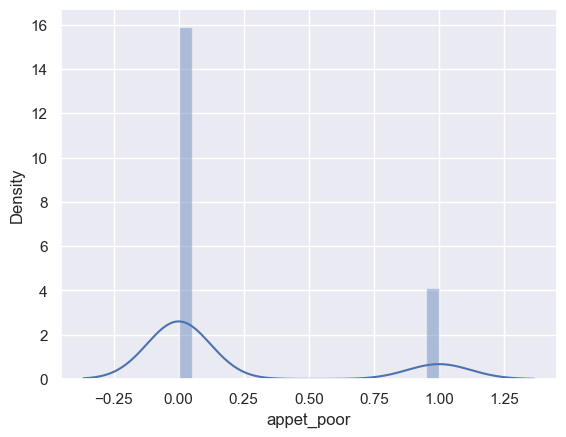

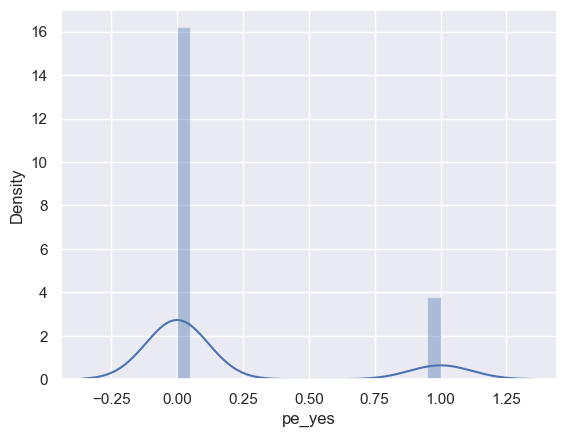

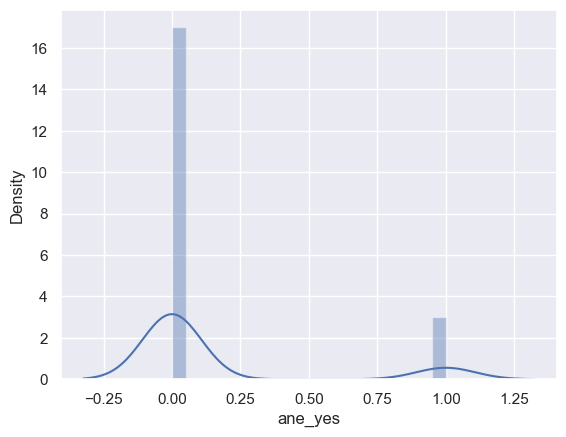

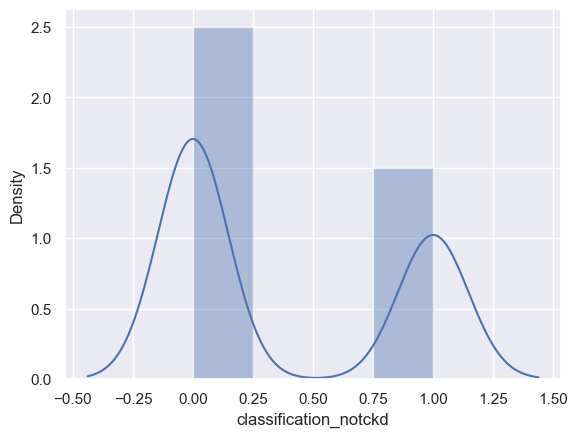

In [36]:
#Finding the Distribution of the data
def distplots(col):
    sns.distplot(df_imputed[col])
    plt.show()

for i in list(df_imputed.select_dtypes(exclude=["object"]).columns)[0:]:
    distplots(i)

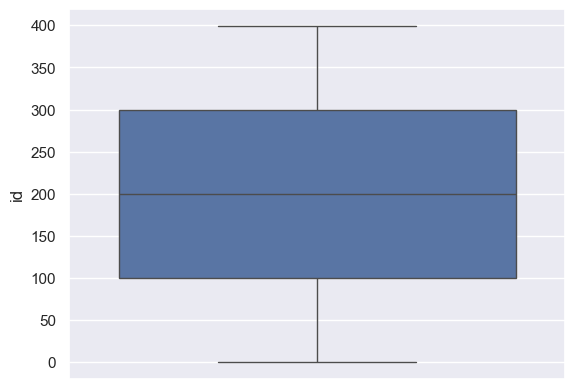

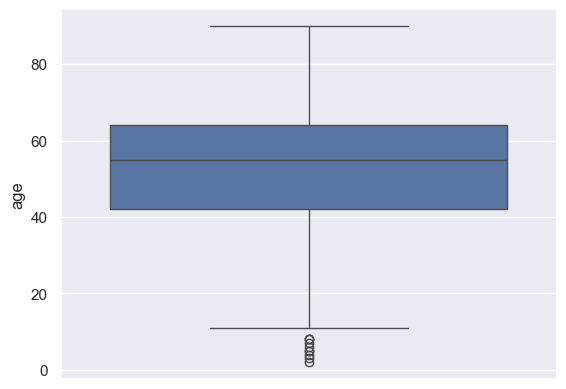

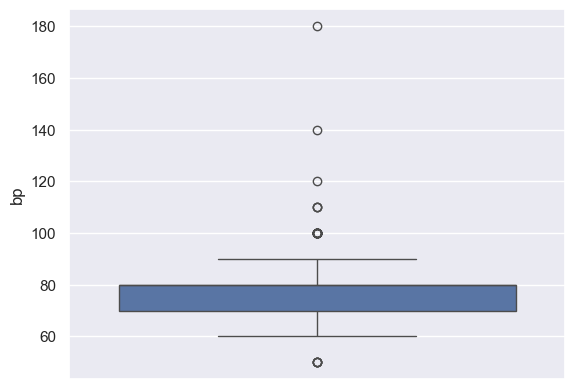

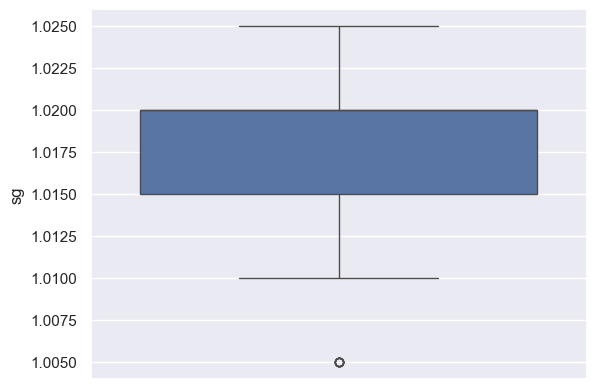

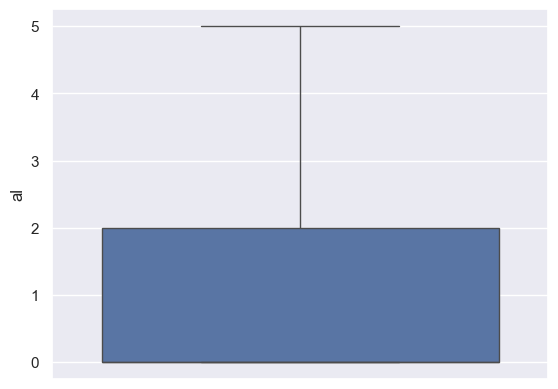

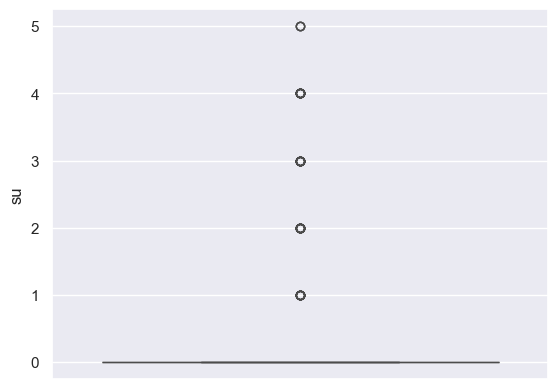

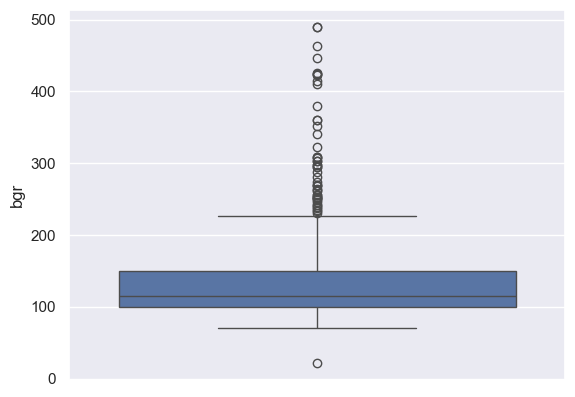

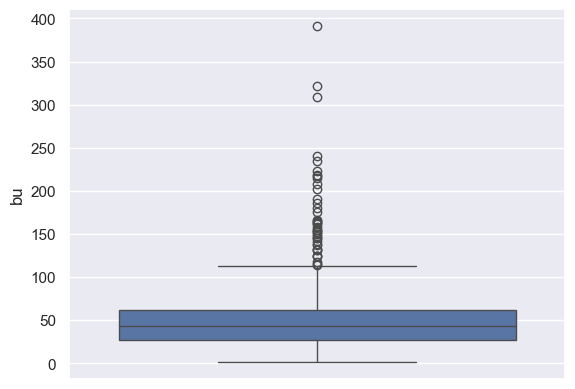

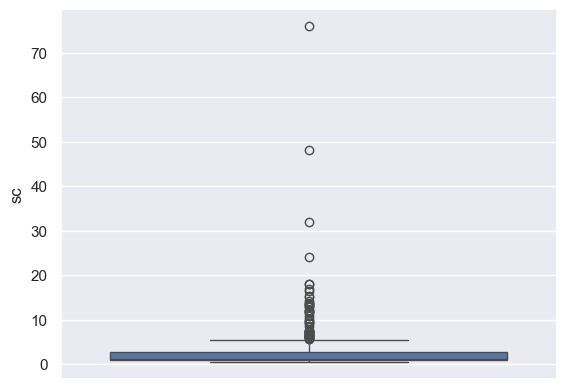

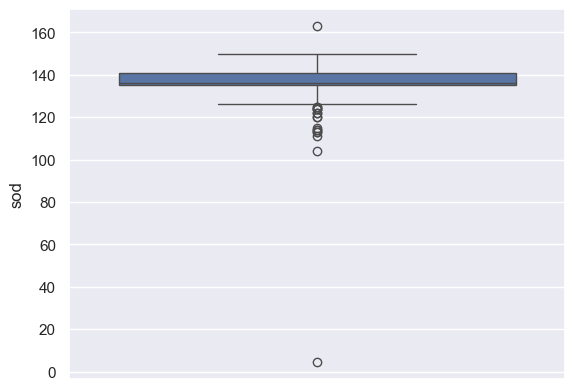

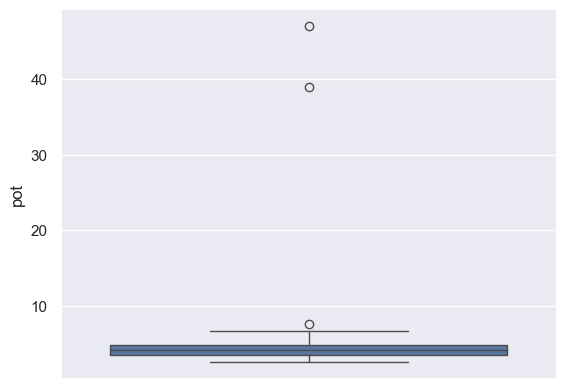

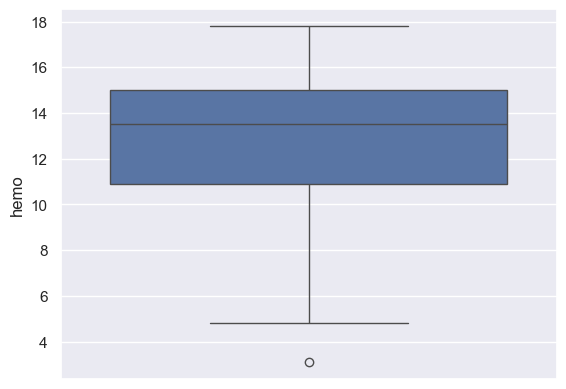

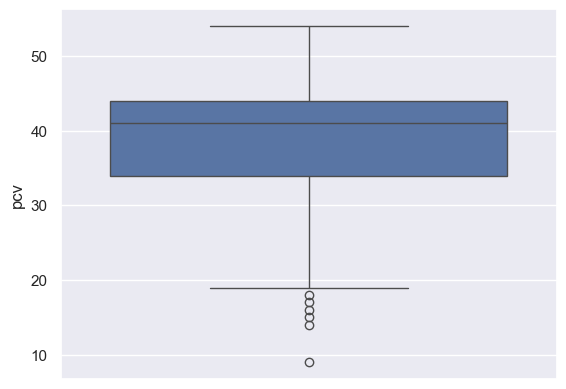

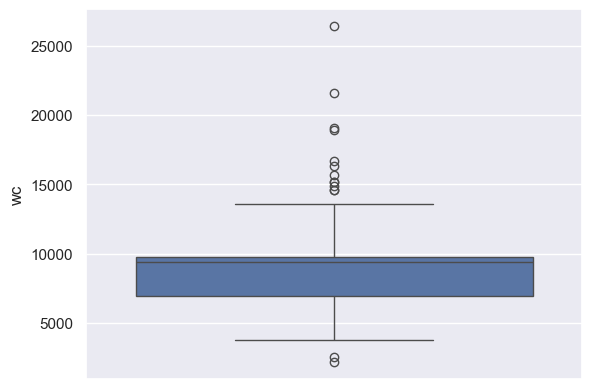

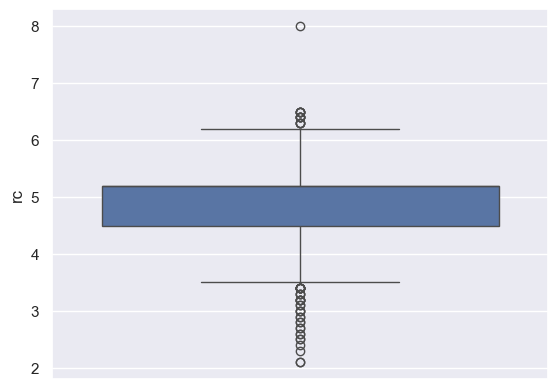

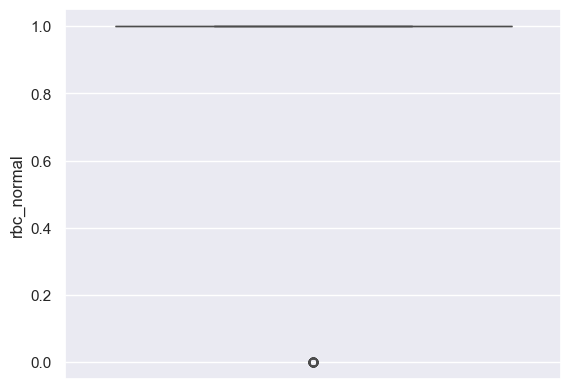

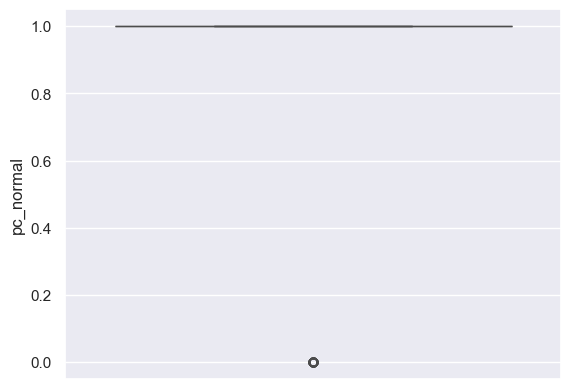

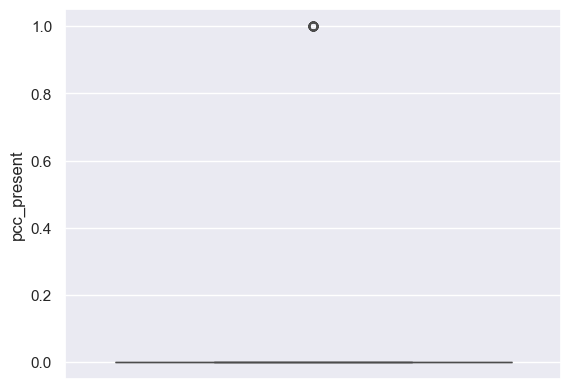

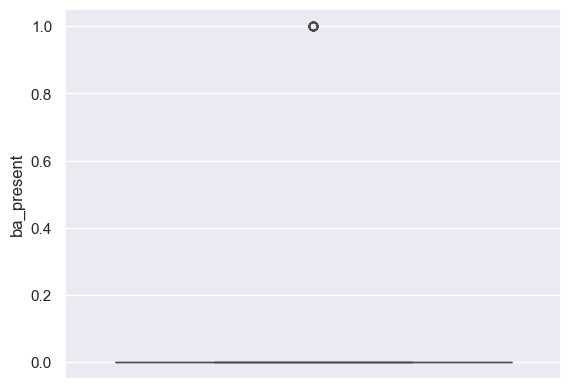

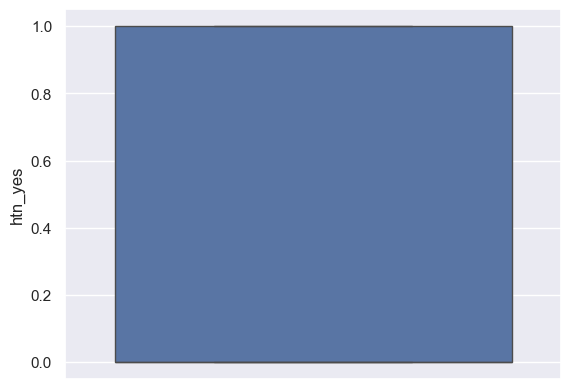

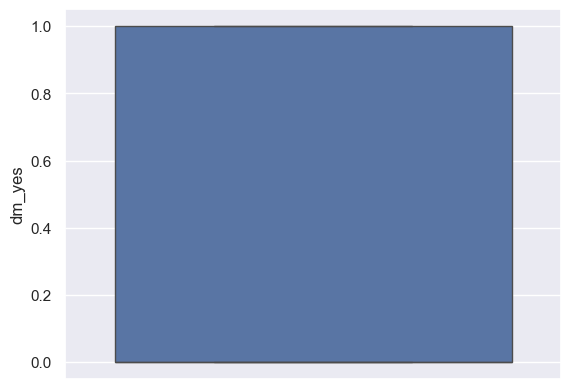

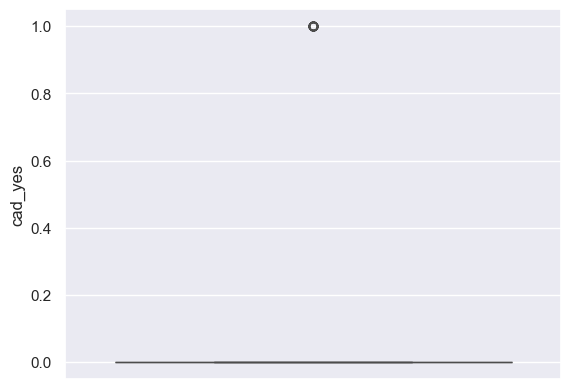

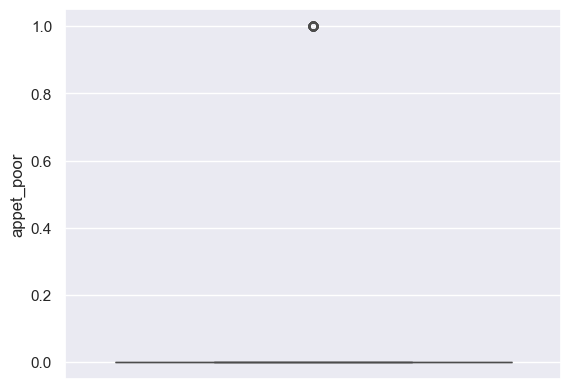

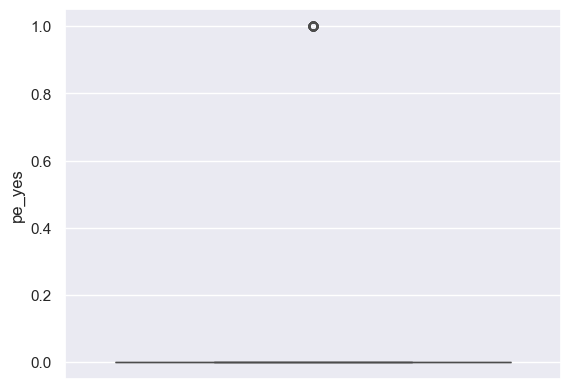

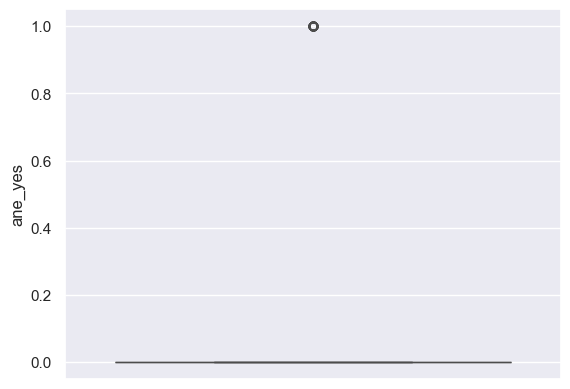

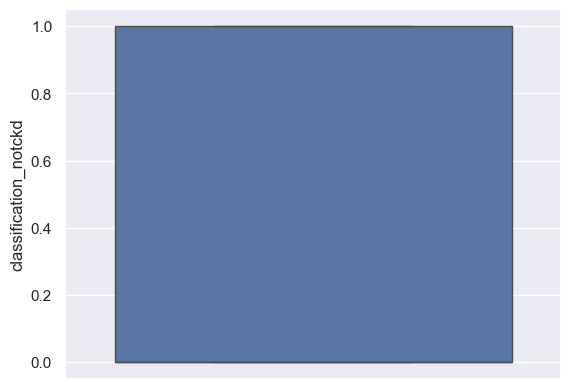

In [37]:
 # Find and remove outliers of the data
def boxplots(col):
    sns.boxplot(df_imputed[col])
    plt.show()

for i in list(df_imputed.select_dtypes(exclude=["object"]).columns)[0:]:
    boxplots(i)

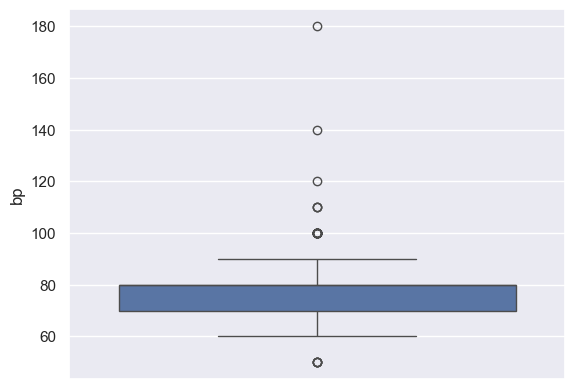

In [38]:
# Using capping method to handle outlier
sns.boxplot(y='bp', data=df_imputed)
plt.show()

In [39]:
df_imputed['bp'].describe()

count    400.000000
mean      76.575000
std       13.489785
min       50.000000
25%       70.000000
50%       80.000000
75%       80.000000
max      180.000000
Name: bp, dtype: float64

In [40]:
# Findings
Q1 = 70.000000
Q3 = 80.000000
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
print(upper_limit,lower_limit)

95.0 55.0


In [41]:
# Capping Method
df_imputed['bp'] = np.where(df_imputed['bp']>upper_limit, upper_limit,
                            np.where(df_imputed['bp'] < lower_limit, lower_limit,df_imputed['bp'] ))

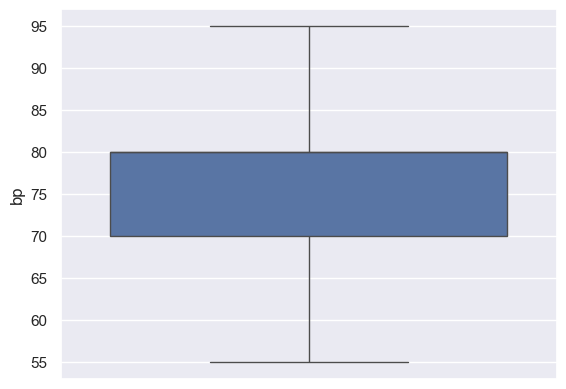

In [42]:
sns.boxplot(y='bp', data=df_imputed)
plt.show()

In [43]:
#bgr
Q1=99
Q3=115
IQR=Q3-Q1
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
print(lower_limit,upper_limit)

75.0 139.0


In [44]:
df_imputed['bgr']= np.where(df_imputed['bgr']>upper_limit,upper_limit,
                           np.where(df_imputed['bgr']<lower_limit,lower_limit,df_imputed['bgr']))

In [45]:
# bu
Q1=27
Q3=61.75
IQR=Q3-Q1
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
print(lower_limit,upper_limit)

-25.125 113.875


In [46]:
df_imputed['bu']= np.where(df_imputed['bu']>upper_limit,upper_limit,
                           np.where(df_imputed['bu']<lower_limit,lower_limit,df_imputed['bu']))


In [47]:
# sod
Q1=135
Q3=141
IQR=Q3-Q1
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR

In [48]:
df_imputed['sod']= np.where(df_imputed['sod']>upper_limit,upper_limit,
                           np.where(df_imputed['sod']<lower_limit,lower_limit,df_imputed['sod']))

In [49]:
# wc
Q1=6975
Q3=9800
IQR=Q3-Q1
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR

In [50]:
df_imputed['wc']= np.where(df_imputed['wc']>upper_limit,upper_limit,
                           np.where(df_imputed['wc']<lower_limit,lower_limit,df_imputed['wc']))

In [51]:
# rc
Q1=4.5
Q3=5.2
IQR=Q3-Q1
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR

In [52]:
df_imputed['rc']= np.where(df_imputed['rc']>upper_limit,upper_limit,
                           np.where(df_imputed['rc']<lower_limit,lower_limit,df_imputed['rc']))

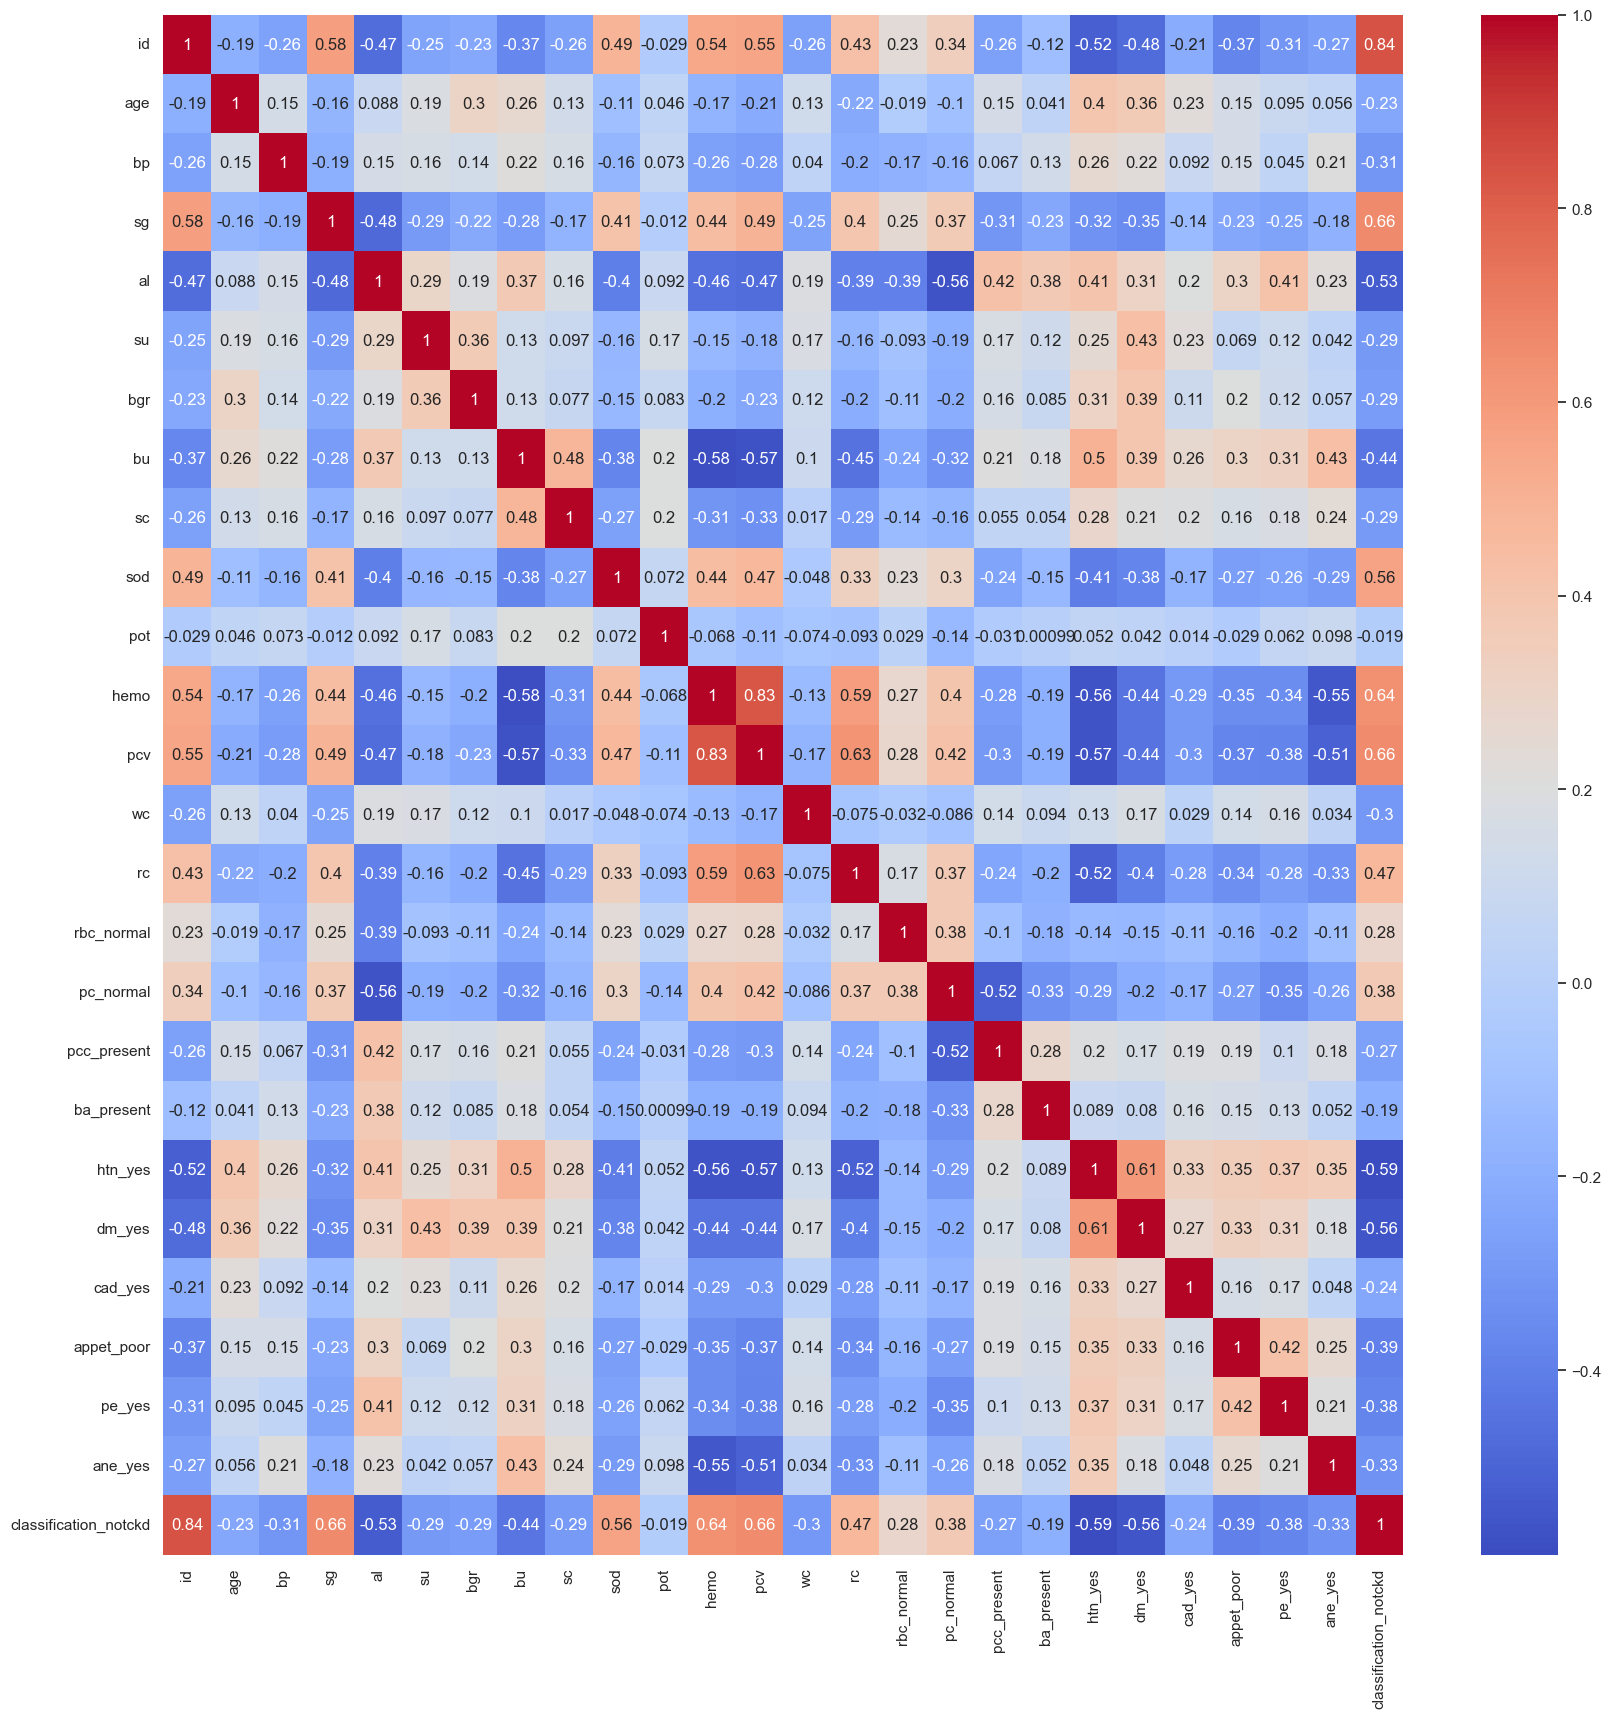

In [53]:
# correlation
plt.figure(figsize=(20,20))
corr = df_imputed.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [54]:
# Advanced EDA part
!pip install dtale
import dtale
dtale.show(df_imputed)

**Label Balance**

In [56]:
#Split the dat into independent and dependent variable
x= df_imputed.drop(['id','classification_notckd'],axis=1) #Dropping the target feature and assigning remaining cols [dependent variable]
y= df_imputed['classification_notckd'] #Assigning the target feature to y

In [57]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_ros ,y_ros =ros.fit_resample(x,y)
print("Original data:" ,y.value_counts())
print()
print("Resampled data:" ,y_ros.value_counts())

Original data: classification_notckd
0    250
1    150
Name: count, dtype: int64

Resampled data: classification_notckd
0    250
1    250
Name: count, dtype: int64


**PCA-Principal Component Analysis**

In [59]:
from sklearn.decomposition import PCA

pca = PCA(.95)
x_pca = pca.fit_transform(x)
print("Before PCA",x.shape)
print()
print("After PCA", x_pca.shape)

Before PCA (400, 24)

After PCA (400, 1)


**Building The Model**


In [61]:
#Spliting the data intoo TESTING and TRAINING
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x_pca,y,test_size=0.2,random_state=42,stratify=y)


In [62]:
#Spliting the data intoo TESTING and TRAINING
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x_pca,y,test_size=0.2,random_state=42,stratify=y)

#Algorithms
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB

In [63]:
list_met = []
list_accuracy = []

# LogisticRegression
logit = LogisticRegression()
lr = logit.fit(x_train, y_train)
y_pred_lr = logit.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# DecisionTree
dtree = DecisionTreeClassifier()
dt = dtree.fit(x_train, y_train)
y_pred_dt = dtree.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# RandomForest
rforest = RandomForestClassifier()
rf = rforest.fit(x_train, y_train)
y_pred_rf = rforest.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# BaggingClassifier
bagging = BaggingClassifier()
bg = bagging.fit(x_train, y_train)
y_pred_bg = bagging.predict(x_test)
accuracy_bg = accuracy_score(y_test, y_pred_bg)

# GradientBoostingClassifier
gradient = GradientBoostingClassifier()
gb = gradient.fit(x_train, y_train)
y_pred_gb = gradient.predict(x_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

# SVC
svm = SVC()
sv = svm.fit(x_train, y_train)
y_pred_sv= svm.predict(x_test)
accuracy_sv = accuracy_score(y_test, y_pred_sv)

# KNeighborsClassifier
knn = KNeighborsClassifier()
kn = knn.fit(x_train, y_train)
y_pred_kn= knn.predict(x_test)
accuracy_kn = accuracy_score(y_test, y_pred_kn)

# GaussianNB
nvtg = GaussianNB()
gn = nvtg.fit(x_train, y_train)
y_pred_gn= nvtg.predict(x_test)
accuracy_gn = accuracy_score(y_test, y_pred_gn)

# GaussianNB
nvb = BernoulliNB()
bn = nvb.fit(x_train, y_train)
y_pred_bn= nvb.predict(x_test)
accuracy_bn = accuracy_score(y_test, y_pred_bn)


# Voting Classifier - combining all model together and making one algorithm

evc = VotingClassifier(estimators = [('lr', lr),('dt', dt),('rf', rf),
                                     ('bg', bg),('gb', gb), ('svm', sv),
                                     ('knn', kn),('gnv', gn),('bnv', bn),
                                     ], voting='hard',
                       flatten_transform = True)
model_evc = evc.fit(x_train, y_train)
pred_evc = evc.predict(x_test)
accuracy_evc = accuracy_score(y_test, pred_evc)

list1 = ['LogisticRegression','DecisionTree', 'RandomForest','Bagging',
         'GradientBoosting','SupportVector','KNN', 'NaiveBayesGaussian',
         'NiaveBayesBernoulli','VotingClassifier']
list2 = [accuracy_lr,accuracy_dt, accuracy_rf, accuracy_bg, accuracy_gb,
         accuracy_sv, accuracy_kn, accuracy_gn, accuracy_bn,
         accuracy_evc]
list3 = [logit,dtree,rforest,bagging,gradient,svm, knn, nvtg, nvb,evc]

df_accuracy = pd.DataFrame({'Method Used' :list1, 'Accuracy' : list2})
print(df_accuracy)

charts = sns.barplot(x='Method Used', y='Accuracy', data=df_accuracy)
charts.set_xticklabels(charts.get_xticklabels(), rotation=90)
print(charts)         

           Method Used  Accuracy
0   LogisticRegression    0.6000
1         DecisionTree    0.7000
2         RandomForest    0.7000
3              Bagging    0.6625
4     GradientBoosting    0.6500
5        SupportVector    0.6125
6                  KNN    0.6000
7   NaiveBayesGaussian    0.6000
8  NiaveBayesBernoulli    0.6125
9     VotingClassifier    0.6500
Axes(0.125,0.11;0.775x0.77)


**Findings**

The accuracy of the models ranges from 60% to 70%, indicating moderate performance.
DecisionTree and RandomForest achieve the highest accuracy of 70%, suggesting that these models are the most effective in predicting kidney disease.